# Introduction

Customer segmentation is a vital strategy for businesses looking to allocate their resources efficiently. One of the most popular and effective methods of customer segmentation is RFM (Recency, Frequency, Monetary) analysis.

RFM analysis is a behaviour-based approach that groups customers into segments based on their past purchase behaviour. It considers three factors: recency, frequency, and monetary value. Using these three factors, RFM analysis categorizes customers into segments and helps businesses identify the most profitable segments.

Recency measures how recently a customer has made a purchase, with a shorter time being better. 

Frequency measures the total number of purchases made by the customer, with a higher frequency being better.

Monetary value measures the total amount spent by the customer, with a higher value being better.

RFM analysis is based on the Pareto principle, which states that 80% of a company's business comes from 20% of its customers. RFM analysis provides a more comprehensive view of customer behaviour compared to traditional single-dimensional segmentation techniques, which often segment customers based on sales value or volume only. For example, a customer segment may consist of big spenders in terms of sales value, but they only purchase once or twice a year. On the other hand, another customer segment may purchase frequently, but the value is very small. RFM analysis overcomes these limitations by providing a more comprehensive and effective approach to customer segmentation.

RFM analysis can help businesses identify customers who are more likely to respond to promotions and personalization services. By targeting these customers, businesses can increase customer retention, loyalty, and ultimately, revenue. It also helps businesses identify customers who are less likely to respond to promotions and who may not be worth targeting. By focusing their efforts on high-potential segments, businesses can allocate their resources more efficiently and improve their bottom line.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pylab

In [156]:
commerce = pd.read_csv("Ecommerce.csv",encoding='unicode_escape')
commerce.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0   29-Nov-16       2.55     17850.0  United Kingdom         NaN  
1   29-Nov-16       3.39     17850.0  United Kingdom         NaN  
2   29-Nov-16       2.75     17850.0  United Kingdom         NaN  
3   29-Nov-16       3.39     17850.0  United Kingdom         NaN  
4   29-Nov-16       3.39     17850.0  United Kingdom         NaN

In [157]:
commerce = commerce.drop(columns = "Unnamed: 8")
commerce.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  
0   29-Nov-16       2.55     17850.0  United Kingdom  
1   29-Nov-16       3.39     17850.0  United Kingdom  
2   29-Nov-16       2.75     17850.0  United Kingdom  
3   29-Nov-16       3.39     17850.0  United Kingdom  
4   29-Nov-16       3.39     17850.0  United Kingdom

## Explore Data Analysis

In [123]:
cargo = commerce.iloc[:,1:3].groupby(['Description'])['Description'].count()
cargo = pd.DataFrame(cargo).rename(columns = {'Description':'count'})
print("Real order examples:", list(cargo.head(10).index))
print("Not order example:", list(cargo.tail(10).index))

Real order examples: [' 4 PURPLE FLOCK DINNER CANDLES', " 50'S CHRISTMAS GIFT BAG LARGE", ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK', ' I LOVE LONDON MINI RUCKSACK', ' NINE DRAWER OFFICE TIDY', ' OVAL WALL MIRROR DIAMANTE ', ' RED SPOT GIFT BAG LARGE', ' SET 2 TEA TOWELS I LOVE LONDON ', ' SPACEBOY BABY GIFT SET']
Not order example: ['wrongly coded 20713', 'wrongly coded 23343', 'wrongly coded-23343', 'wrongly marked', 'wrongly marked 23343', 'wrongly marked carton 22804', 'wrongly marked. 23343 in box', 'wrongly sold (22719) barcode', 'wrongly sold as sets', 'wrongly sold sets']


Keep the real orders.

In [158]:
commerce = commerce[commerce['Description'].str.isupper()==1]

In [159]:
commerce['Total'] = commerce['Quantity'] * commerce['UnitPrice']
commerce

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  Total  
0        29-Nov-16       2.55     17850.0  United Kingdom  15.30  
1        29-Nov-16       3.39     17850.0  United Kingdom  20.34  
2        29-Nov-16       2.75     17850.0  United Kingdom  22.00  
3        29-Nov-16       3.39     17850.0  United Kingdom  20.34  
4        29-Nov-16       3.39     17850.0  United Kingdom  20.34  
...            ...        ...         ...             ...    ...  
541904    7-Dec-17       0.85     12680.0          France  10.20  
541905    7-Dec-17       2.10     12680.0          France  12.60  
541906    7-Dec-17       4.15     12680.0          France  16.60  
541907    7-Dec-17       4.15     12680.0          France  16.60  
541908    7-Dec-17       4.95     12680.0          France  14.85  

[537363 rows x 9 columns]

The cancelled orders still exist.

In [160]:
cancel = commerce.loc[commerce['Quantity']<0]
cancel['Total'] = abs(cancel['Total'])
commerce = commerce.loc[commerce['Quantity']>0]
cancel

C:\Users\jigme\AppData\Local\Temp\ipykernel_25224\801038359.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

       InvoiceDate  UnitPrice  CustomerID         Country  Total  
154      29-Nov-16       4.65     15311.0  United Kingdom   4.65  
235      29-Nov-16       1.65     17548.0  United Kingdom  19.80  
236      29-Nov-16       0.29     17548.0  United Kingdom   6.96  
237      29-Nov-16       0.29     17548.0  United Kingdom   6.96  
238      29-Nov-16       0.29     17548.0  United Kingdom   6.96  
...            ...        ...         ...             ...    ...  
540448    7-Dec-17       1.95     14397.0  United Kingdom  23.40  
540449    7-Dec-17       0.83     14397.0  United Kingdom   9.13  
541715    7-Dec-17      10.95     15311.0  United Kingdom  54.75  
541716    7-Dec-17       1.25     17315.0  United Kingdom   1.25  
541717    7-Dec-17       1.25     17315.0  United Kingdom   6.25  

[8908 rows x 9 columns]

There are some cancelled orders which had no purchase record.

In [161]:
newcheck = commerce.merge(cancel, how='outer', left_on=['Total','CustomerID'], right_on=['Total','CustomerID'])
newcheck.iloc[:,[0,3,6,8,9,12]]

InvoiceNo_x  Quantity_x  CustomerID  Total InvoiceNo_y  Quantity_y
0           536365         6.0     17850.0  15.30         NaN         NaN
1           536373         6.0     17850.0  15.30         NaN         NaN
2           536373         6.0     17850.0  15.30         NaN         NaN
3           536375         6.0     17850.0  15.30         NaN         NaN
4           536375         6.0     17850.0  15.30         NaN         NaN
...            ...         ...         ...    ...         ...         ...
609838         NaN         NaN     13883.0   1.25     C581466        -1.0
609839         NaN         NaN     13599.0  21.00     C581468       -10.0
609840         NaN         NaN     17924.0   8.32     C581470        -4.0
609841         NaN         NaN     14397.0  23.40     C581490       -12.0
609842         NaN         NaN     14397.0   9.13     C581490       -11.0

[609843 rows x 6 columns]

Proof: There are some cancelled orders which had no purchase record.

No purchase record for customer 14397.0 spending 23.4 dollars.

In [64]:
commerce[(commerce['CustomerID']==14397.0) & (commerce['Total']==23.4)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Total]
Index: []

But customer 14397.0 has a cancelled record with 23.4 dollars.

In [65]:
cancel[(cancel['CustomerID']==14397.0) & (cancel['InvoiceNo']=='C581490')]

InvoiceNo StockCode                      Description  Quantity  \
540448   C581490     22178  VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144  ZINC T-LIGHT HOLDER STARS SMALL       -11   

       InvoiceDate  UnitPrice  CustomerID         Country  Total  
540448    7-Dec-17       1.95     14397.0  United Kingdom  23.40  
540449    7-Dec-17       0.83     14397.0  United Kingdom   9.13

Keep the real purchased orders. There are still nan in customerID.

In [162]:
real = newcheck[(newcheck['InvoiceNo_x'].notna()) & (newcheck['InvoiceNo_y'].isna())].iloc[:,:8].rename(columns={"InvoiceNo_x": "InvoiceNo", "StockCode_x": "StockCode", "Description_x": "Description", "Quantity_x": "Quantity", "InvoiceDate_x":"InvoiceDate","UnitPrice_x":"UnitPrice", "Country_x":"Country"})
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472421 entries, 0 to 605335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    472421 non-null  object 
 1   StockCode    472421 non-null  object 
 2   Description  472421 non-null  object 
 3   Quantity     472421 non-null  float64
 4   InvoiceDate  472421 non-null  object 
 5   UnitPrice    472421 non-null  float64
 6   CustomerID   370994 non-null  float64
 7   Country      472421 non-null  object 
dtypes: float64(3), object(5)
memory usage: 32.4+ MB


Rename the customerID with the invoice number.

In [163]:
inv = real.loc[real['CustomerID'].isna(),['InvoiceNo']].squeeze().to_list()
real.loc[real['CustomerID'].isna(),['CustomerID']] = inv

print("Number of nan {}".format(real.loc[real['CustomerID'].isna(),['CustomerID']].count()))

Number of nan CustomerID    0
dtype: int64


Remove duplicates, since it is unreasonable to seperate the same item in one invoice.

In [164]:
print("Number of duplicate rows: {}".format(real.duplicated().sum()))
real= real.drop_duplicates()

Number of duplicate rows: 4775


In [244]:
keys = list(real['Country'].unique())
values = [str(x) for x in range(1, 39)]
res = {keys[i]: values[i] for i in range(len(keys))}
real=real.replace({"Country": res})

In [245]:
keys = real['StockCode'].unique()
values = [str(x) for x in range(1, 3857)]

res2 = {keys[i]: values[i] for i in range(len(keys))}
real=real.replace({"StockCode": res2})
real

InvoiceNo StockCode                         Description  Quantity  \
0         536365         1  WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536373         1  WHITE HANGING HEART T-LIGHT HOLDER       6.0   
2         536373         2         WOODEN FRAME ANTIQUE WHITE        6.0   
3         536375         1  WHITE HANGING HEART T-LIGHT HOLDER       6.0   
4         536375         2         WOODEN FRAME ANTIQUE WHITE        6.0   
...          ...       ...                                 ...       ...   
605331    581584      1471    RED FLOCK LOVE HEART PHOTO FRAME      72.0   
605332    581584      1722     6 CHOCOLATE LOVE HEART T-LIGHTS      48.0   
605333    581585        41          ALARM CLOCK BAKELIKE GREEN       8.0   
605334    581587        54         PACK OF 20 SPACEBOY NAPKINS      12.0   
605335    581587       597       BAKING SET 9 PIECE RETROSPOT        3.0   

       InvoiceDate  UnitPrice CustomerID Country  
0        29-Nov-16       2.55    17850.0       1  
1        29-Nov-16       2.55    17850.0       1  
2        29-Nov-16       2.55    17850.0       1  
3        29-Nov-16       2.55    17850.0       1  
4        29-Nov-16       2.55    17850.0       1  
...            ...        ...        ...     ...  
605331    7-Dec-17       0.72    13777.0       1  
605332    7-Dec-17       1.85    13777.0       1  
605333    7-Dec-17       3.75    15804.0       1  
605334    7-Dec-17       0.85    12680.0       2  
605335    7-Dec-17       4.95    12680.0       2  

[467646 rows x 8 columns]

In [269]:
df = real.drop(columns= ['Description'])
df

InvoiceNo StockCode  Quantity InvoiceDate  UnitPrice CustomerID Country
0         536365         1       6.0   29-Nov-16       2.55    17850.0       1
1         536373         1       6.0   29-Nov-16       2.55    17850.0       1
2         536373         2       6.0   29-Nov-16       2.55    17850.0       1
3         536375         1       6.0   29-Nov-16       2.55    17850.0       1
4         536375         2       6.0   29-Nov-16       2.55    17850.0       1
...          ...       ...       ...         ...        ...        ...     ...
605331    581584      1471      72.0    7-Dec-17       0.72    13777.0       1
605332    581584      1722      48.0    7-Dec-17       1.85    13777.0       1
605333    581585        41       8.0    7-Dec-17       3.75    15804.0       1
605334    581587        54      12.0    7-Dec-17       0.85    12680.0       2
605335    581587       597       3.0    7-Dec-17       4.95    12680.0       2

[467646 rows x 7 columns]

## RFM Analysis

### Monetary

In [166]:
df_monetary = pd.DataFrame(df['CustomerID'])
df_monetary['Monetary'] = df["Quantity"] * df["UnitPrice"]
monetary = df_monetary.groupby("CustomerID")["Monetary"].sum().round(2)
df_monetary = pd.DataFrame(monetary)
df_monetary = df_monetary.reset_index(level=0)
df_monetary.head()


CustomerID  Monetary
0    12347.0   4310.00
1    12348.0   1797.24
2    12349.0   1757.55
3    12350.0    334.40
4    12352.0   1074.53

C:\Users\jigme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

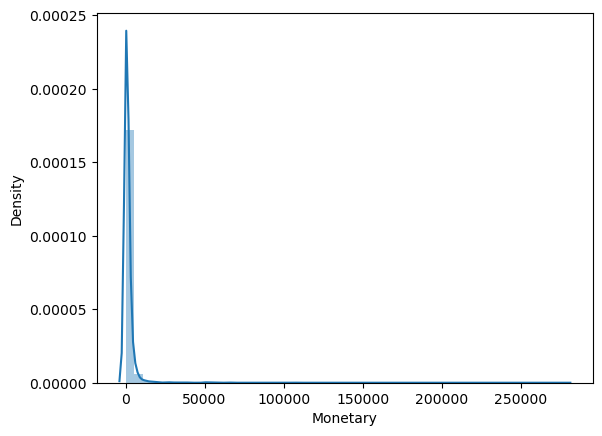

In [22]:
sns.distplot(df_monetary.Monetary)

** Although there are outliers present, the majority of the points are still distributed along a Gaussian distribution, as evidenced by the Q-Q plot. The degree to which the blue points align with the red line on the plot is indicative of the level of conformity to a Gaussian distribution.

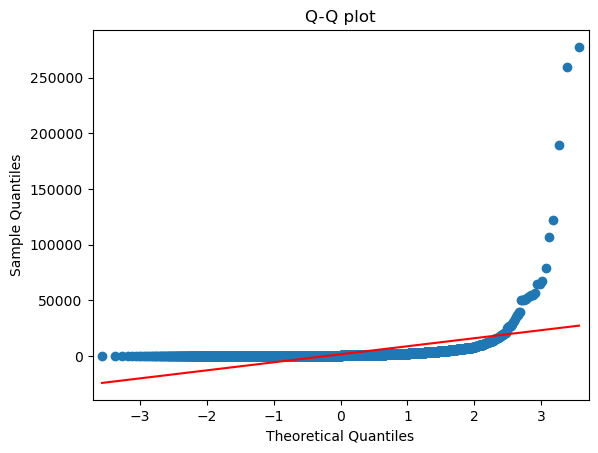

In [23]:
sm.qqplot(df_monetary.Monetary, line='s')
pylab.title('Q-Q plot')
pylab.show()

### Recency

In [167]:
df_recency= df[['CustomerID','InvoiceDate']]
df_recency['Recency']=df_recency['InvoiceDate'].map(lambda x : (datetime.now()-datetime.strptime(x, '%d-%b-%y')).days)

df_recency=pd.DataFrame(df_recency.groupby('CustomerID',as_index=False)['Recency'].min()) 
df_recency.head()

C:\Users\jigme\AppData\Local\Temp\ipykernel_25224\1659192927.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CustomerID  Recency
0    12347.0     1926
1    12348.0     1999
2    12349.0     1942
3    12350.0     2234
4    12352.0     1960

In [25]:
fig = px.box(df_recency, y="Recency")

fig.show()

** There are no outliers in recency.

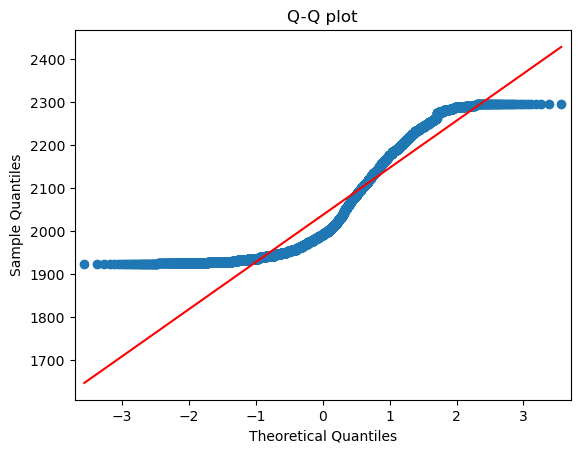

In [26]:
sm.qqplot(df_recency.Recency, line='s')
pylab.title('Q-Q plot')
pylab.show()

### Frequency

In [168]:
df_frequence = df.drop(['StockCode'],axis=1)
df_frequence = df_frequence.drop_duplicates(subset=['InvoiceNo'])
df_frequence['Frequency'] = df_frequence.groupby('CustomerID')['InvoiceDate'].transform('count')
df_frequence = df_frequence[['CustomerID','Frequency']].drop_duplicates(subset=['CustomerID'])
df_frequence.head()

CustomerID  Frequency
0      17850.0         18
132    13047.0          9
191    12583.0         15
273    13748.0          5
370    15100.0          3

C:\Users\jigme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Frequency', ylabel='Density'>

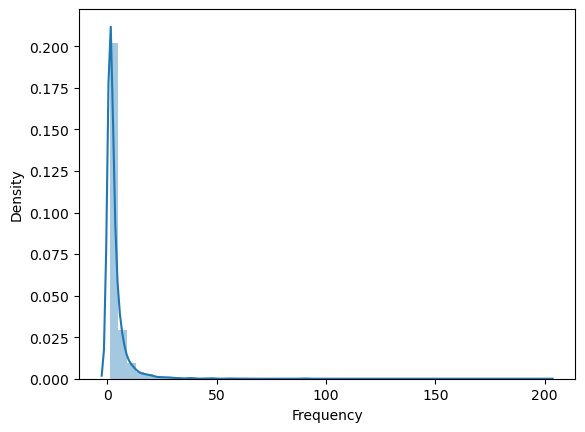

In [28]:
sns.distplot(df_frequence.Frequency)

** There is a significant amount (around half) of the value "one" appears in frequency.

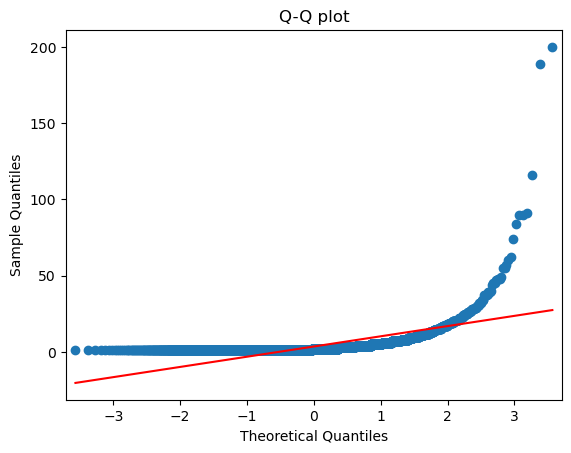

In [29]:
sm.qqplot(df_frequence.Frequency, line='s')
pylab.title('Q-Q plot')
pylab.show()

In [169]:
RFM = pd.merge(df_monetary,df_frequence,on ='CustomerID')
RFM=pd.merge(RFM,df_recency,on='CustomerID')

RFM2 = RFM.copy()
des = RFM.describe().T
des

count         mean          std     min      25%      50%  \
Monetary   5525.0  1742.730148  7206.346913     0.0   259.17   636.68   
Frequency  5525.0     3.498824     6.700471     1.0     1.00     2.00   
Recency    5525.0  2037.676923   109.730536  1924.0  1946.00  1992.00   

               75%        max  
Monetary   1575.23  277524.02  
Frequency     4.00     200.00  
Recency    2116.00    2297.00

### RFM Score

Use IQR to determine the score. 

In [170]:
name = []
for i, d in enumerate(des.index):

    RFM2[d+'_score'] = pd.cut(RFM[d], [des.iloc[i,3]-1]+list(des.iloc[i,4:]),labels=False)
    name.append(d+'_score')
RFM2

CustomerID  Monetary  Frequency  Recency  Monetary_score  \
0       12347.0   4310.00          7     1926               3   
1       12348.0   1797.24          4     1999               3   
2       12349.0   1757.55          1     1942               3   
3       12350.0    334.40          1     2234               1   
4       12352.0   1074.53          6     1960               2   
...         ...       ...        ...      ...             ...   
5520     581431     17.90          1     1925               0   
5521     581439   5854.75          1     1925               3   
5522     581492   6993.92          1     1924               3   
5523     581497   3125.56          1     1924               3   
5524     581498   5424.38          1     1924               3   

      Frequency_score  Recency_score  
0                   3              0  
1                   2              2  
2                   0              0  
3                   0              3  
4                   3              1  
...               ...            ...  
5520                0              0  
5521                0              0  
5522                0              0  
5523                0              0  
5524                0              0  

[5525 rows x 7 columns]

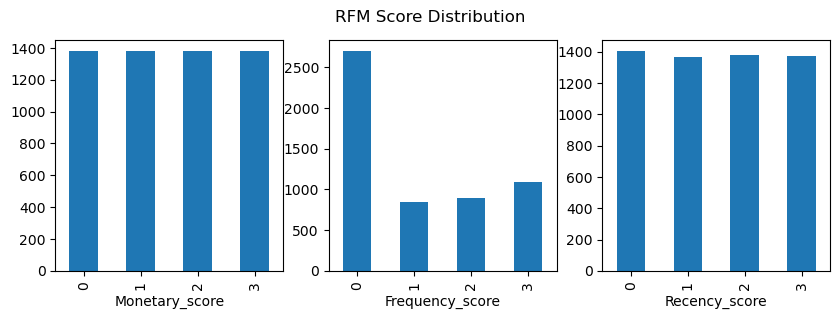

In [171]:
plt.figure(figsize=(10, 3))

for i in range(3):
    a = 131+i
    plt.subplot(a)
    d = RFM2.groupby([name[i]])[name[i]].count()
    d.plot.bar(x=[0,1,2,3], y=name[i])
    plt.xlabel(name[i])

plt.suptitle('RFM Score Distribution')
plt.show()

# Clustering

Clustering is an unsupervised learning method that divides the feature space into clusters or groups of similar objects. Here uses three clustering algorithms,the Hierarchical clustering, the Gaussian Mixture and the K-means.

### K-means

In K-means clustering, each cluster is represented by its center which corresponds to the mean of the observation values assigned to the cluster. Before training the model, we have to determining the Optimal Number of Clusters. Here determine the optimal number of clusters using techniques inertia and Elbow method.

In [172]:
n_clusters = range(2,15)
inertia_errors = []

X = RFM2.iloc[:,-3:]
for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_errors.append(model.inertia_)

print("Inertia:", inertia_errors)

Inertia: [10328.140449202941, 7838.6634956188345, 5718.527119204933, 4689.191301584008, 4137.371050116704, 3559.06178965463, 3267.153720821437, 2935.273985924651, 2546.8756960643896, 2431.4627486932623, 2275.9474340920274, 2038.551667768086, 1896.6728246920754]


#### Plot inertia(WCSS) with elbow method

Inertia is calculated as the sum of squared distances between each data point and its assigned centroid, across all clusters. The goal of K-means algorithm is to minimize the inertia, i.e., to minimize the sum of squared distances between data points and their assigned centroids. A lower value of inertia indicates that the clusters are tightly packed and the data points within each cluster are similar to each other.

In [173]:
fig = px.line(
    x=n_clusters, 
    y=inertia_errors, 
    title="K-Means Model: Inertia vs N"
)
fig.update_layout(xaxis_title="Number of Clusters (k)", yaxis_title="Inertia")
fig.show()

Four is the elbow point in the plot, where the inertia begins to level off and the rate of decrease slows down. Therefore, K is 4.

In [174]:
# Build model
final_model = KMeans(n_clusters=4, random_state=42)
# Fit model to data
final_model.fit(X)
RFM2['k-means'] = final_model.predict(X)

labels_K = final_model.predict(X)
xgb = X.groupby(labels_K).mean().round(2)

fig = px.bar(
    xgb,
    barmode="group",
    title="k-means"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="RFM Value")
fig.show()

** Our target coustomers are the group with low recency score, and both high monetary and frequency score.

### Gaussian Mixture

Gaussian Mixture Model (GMM) is a type of probabilistic model used for clustering, density estimation, and classification. It is a mixture model that assumes the data is generated from a mixture of Gaussian distributions, where each component represents a cluster or a group of data points.
The GMM algorithm estimates the parameters of the mixture model using the Expectation-Maximization (EM) algorithm. The EM algorithm is an iterative optimization algorithm that alternates between computing the probability of each data point belonging to each component (Expectation step) and updating the parameters of each component based on the weighted sum of the data points (Maximization step).

BIC stands for Bayesian Information Criterion, which is a statistical criterion used for model selection and comparison. In the context of Gaussian Mixture Models (GMMs), BIC is a metric that is used to evaluate the goodness of fit of the GMM to the data and to select the optimal number of components or clusters. The BIC score penalizes the number of parameters in the model (i.e., the number of components) to avoid overfitting. A lower BIC score indicates a better model fit, where the model is able to capture the underlying patterns and structure of the data.

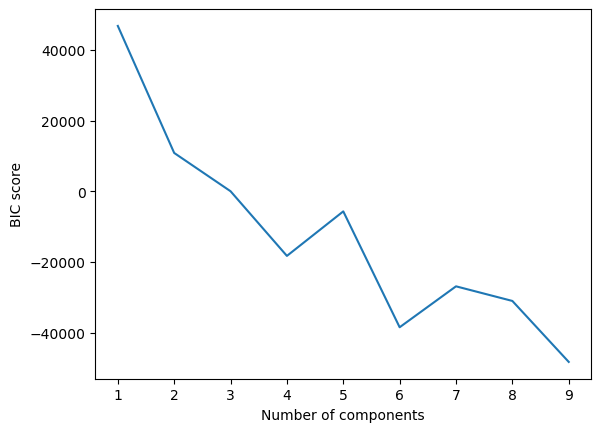

In [175]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

n_components_range = range(1, 10)
bic_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))


import matplotlib.pyplot as plt

plt.plot(n_components_range, bic_scores)
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.show()


The initial parameters are from kmeans and the n_components is 6. 

In [176]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize

gmm = GaussianMixture(n_components=6, init_params='kmeans', random_state=42)
gmm.fit(X)

means_init = gmm.means_
weights_init = gmm.weights_

best_gmm = None
best_score = -np.inf
for i in range(10):
    gmm = GaussianMixture(n_components=6, weights_init=weights_init,
                      means_init=means_init, random_state=42, )
    gmm.fit(X)
    score = gmm.score(X)
    if score > best_score:
        best_gmm = gmm
        best_score = score
    means_init = best_gmm.means_
    weights_init = best_gmm.weights_

In [177]:
RFM2['Gaussian Mixture'] = best_gmm.predict(X)

labels_G = RFM2['Gaussian Mixture']
xgb = X.groupby(labels_G).mean().round(2)

fig = px.bar(
    xgb,
    barmode="group",
    title="Gaussian Mixture"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="RFM Value")
fig.show()

** Our target coustomers are the group with low recency score, and both high monetary and frequency score.

### Hierarchical Clustering

Hierarchical clustering is a type of clustering algorithm that groups similar data points together into clusters based on their pairwise similarities or distances. The output of hierarchical clustering is a dendrogram, which is a tree-like diagram that shows the hierarchical relationship between the clusters. Here uses divisive clustering, which starts with all data points in a single cluster and then recursively divides the cluster into smaller and smaller clusters until a stopping criterion is met.

Here tried three method:

Complete linkage: This method merges the two clusters that have the smallest distance between their furthest points. This method tends to create compact, spherical clusters.

Average linkage: This method merges the two clusters that have the smallest average distance between all their points. This method tends to balance the effects of single and complete linkage and is a good compromise between them.


Ward linkage: This method minimizes the sum of squared differences within all clusters. It tends to create clusters with similar sizes and variances.


The choice of linkage method can significantly affect the clustering output and the structure of the dendrogram. In general, Ward linkage is considered to be the most effective linkage method for most datasets as it tends to create clusters with similar sizes and variances, which is important for statistical analysis.

In [178]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X, method='ward', metric="euclidean")
complete = linkage(X, method="complete", metric="euclidean")
average = linkage(X, method="average", metric="euclidean")

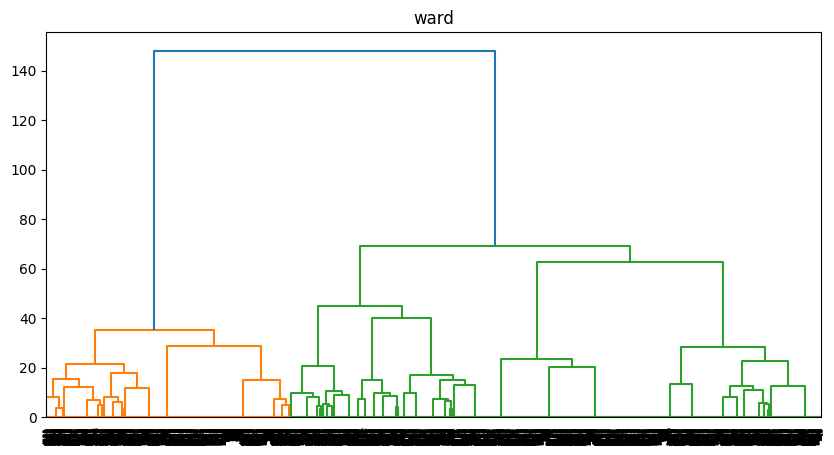

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("ward")
plt.show()

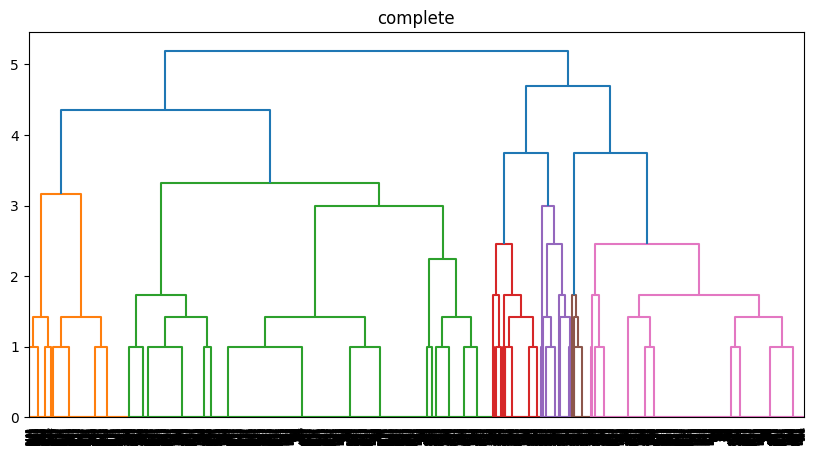

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(complete)
plt.title("complete")
plt.show()

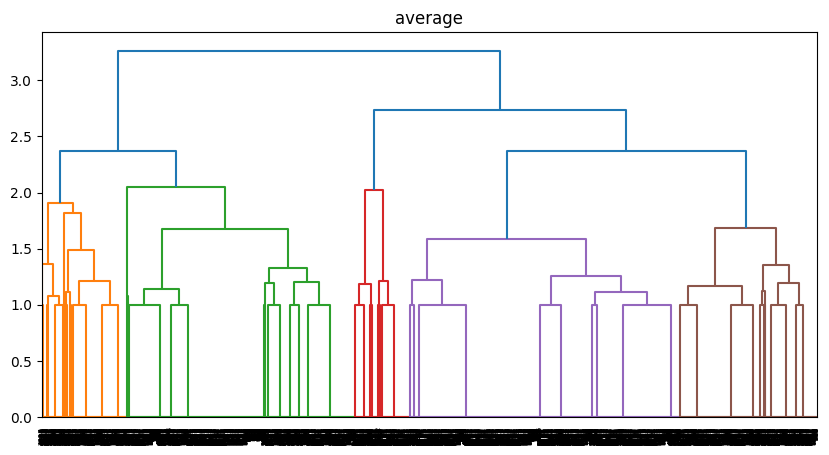

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(average)
plt.title("average")
plt.show()

Here use Elbow method to find the optimal number of clusters. This method involves visually inspecting the dendrogram and identifying the point where the decrease in the inter-cluster distance or linkage slows down significantly. This point is known as the "elbow point" and indicates the optimal number of clusters.

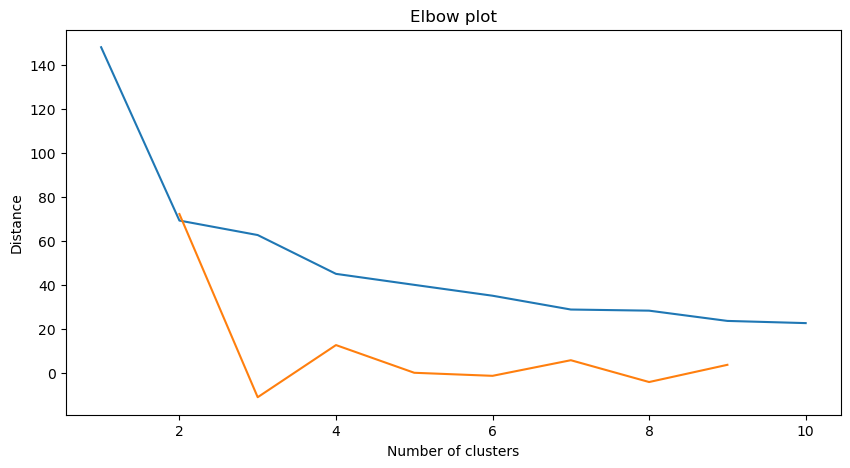

Optimal number of clusters: 2


In [179]:
# Use elbow method to determine optimal number of clusters
last = Z[-10:, 2] # consider the last 10 merges
last_rev = last[::-1] # reverse the order of the distances
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(10, 5))
plt.plot(idxs, last_rev)

# Compute the second derivative of the distances
acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2]+1, acceleration_rev)
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow plot')
plt.show()
k = acceleration_rev.argmax() + 2  
print("Optimal number of clusters:", k)


In [180]:
RFM2['Hierarchical Clustering'] = fcluster(Z, 2, criterion = 'maxclust')


labels_H = RFM2['Hierarchical Clustering']
xgb = X.groupby(labels_H).mean().round(2)

fig = px.bar(
    xgb,
    barmode="group",
    title="Hierarchical Clustering"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="RFM Value")
fig.show()

## Evaluation

### Silhouette Coefficient

The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is between -1 and 1.

In [181]:
sck = silhouette_score(RFM2.iloc[:,4:8], labels_K, metric='euclidean')
scg = silhouette_score(RFM2.iloc[:,4:8], labels_G, metric='euclidean')
sch = silhouette_score(RFM2.iloc[:,4:8], labels_H, metric='euclidean')
print(sck, scg, sch)

0.5576028597985688 0.21202642543929964 0.3833748322120585


### Davies-Bouldin(DB) Index

Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

In [182]:
dbk = davies_bouldin_score(RFM2.iloc[:,4:8], labels_K)
dbg = davies_bouldin_score(RFM2.iloc[:,4:8], labels_G)
dbh = davies_bouldin_score(RFM2.iloc[:,4:8], labels_H)
print(dbk, dbg, dbh)

0.8292006140861407 2.178064808829625 0.9988176300310192


Inspecting the relationship between variables is very important because highly correlated or collinear variables may disrupt the algorithm and eventually affect distinguished clusters. High correlation between two variables means that they have similar trends and are likely to carry similar information. If two variables are perfectly correlated, the concept represented by both variables is represented twice in the data. 

The high correlation between these variables will be reduced later by applying the Principal Component Analysis (PCA).

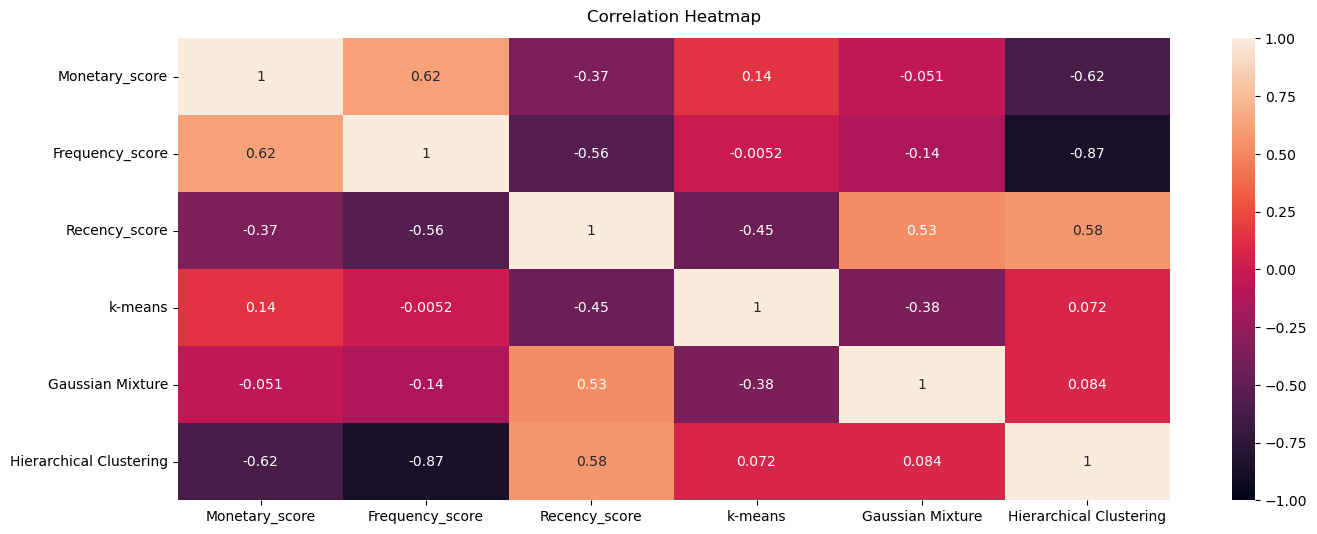

In [203]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(RFM2.iloc[:,-6:].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

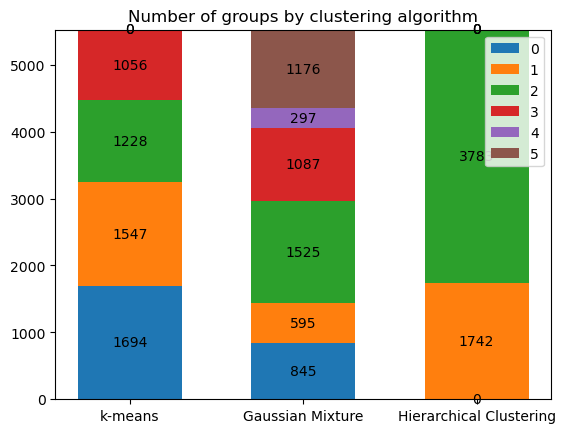

The vip cluster in k-means is 1 and there are 1547 customers ranked as VIP.
The vip cluster in GMM is 3 and there are 1087 customers ranked as VIP.
The vip cluster in Hierarchical Clustering is 1 and there are 1742 customers ranked as VIP.


In [227]:
types = RFM2.iloc[:, -3:].columns.to_list()
dic = {}
for i in range(6):
    dic[i] = []
    for j in range(3):
        n = RFM2[RFM2[types[j]]==i].count().to_list()[0]
        dic[i] = dic[i]+[n]
width = 0.6 # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for d, dic_count in dic.items():
    p = ax.bar(types, dic_count, width, label=d, bottom=bottom)
    bottom += dic_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of groups by clustering algorithm')
ax.legend()

plt.show()
print("The vip cluster in k-means is 1 and there are 1547 customers ranked as VIP.")
print("The vip cluster in GMM is 3 and there are 1087 customers ranked as VIP.")
print("The vip cluster in Hierarchical Clustering is 1 and there are 1742 customers ranked as VIP.")

Since there are different clustering result, to decide the real vip customers, we will use PCA to reduce the dimensionality and extract the real vips.

# PCA

Principal Component Analysis (PCA) is a statistical method that can be used to reduce the dimensionality of a dataset, extract meaningful features, and visualize high-dimensional data. It is an unsupervised technique, meaning it does not require labeled data to operate.

Now we have three clustering results and RFM scores. Check the explained variance ratio first to decide the number of dimensions, which needs to be around or higher than 0.80. The Cumulative Line Plot tells that the number of dimensions should be reduced to 3.

In [321]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(RFM2.iloc[:,-6:])
a = pca.explained_variance_ratio_.round(5)
a

array([0.47846, 0.2825 , 0.12643, 0.07362, 0.03455, 0.00444])

We can see that PC1 explains about 48% of the variance in the data, PC2 explains about 28% of the variance in the data, PC3 explains about 12% of the variance in the data.

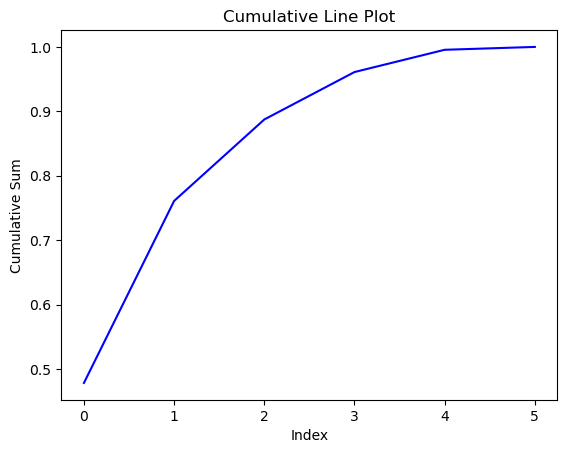

In [322]:
cumulative_data = np.cumsum(a)

plt.plot(cumulative_data, color='blue')
plt.title('Cumulative Line Plot')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.show()

In [323]:
RFM3 = RFM2.copy()

Compare to the outcome plot, we can tell that 

In [324]:
pca = PCA(n_components=3)

Principal_components=pca.fit_transform(RFM2.iloc[:,-6:])
RFM3[['PC 1', 'PC 2', 'PC 3']] = Principal_components

This chart shows the contributions of variables, which indicate that monetary is the most important feature.

Text(0.5, 1.0, 'Contributions of variables to PC1')

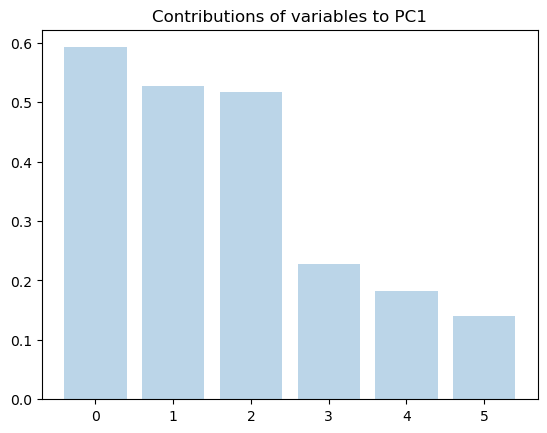

In [328]:
eigenvalues=pca.components_
N_elements=6
PC1=abs(eigenvalues[1,:])
PC1.sort(axis=0)
PC1=PC1[::-1]
PC1=PC1[0:N_elements]

plt.bar(range(N_elements), PC1, alpha=0.3, align='center')
plt.title('Contributions of variables to PC1')

## Plot the outcome

Use colour to represent the k-means clusters and to help find the target cluster in the 3D scatter plot. The purple points are those clustered vip by k-means. The scatter plot shows that most of the points gather in an area, which is our target area.

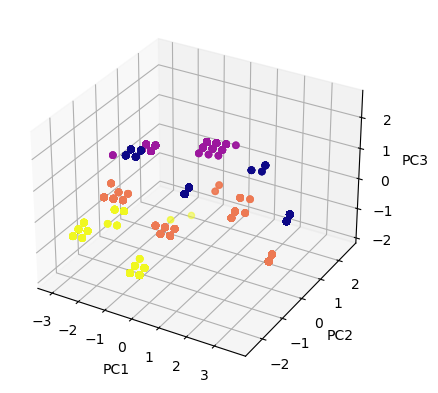

In [207]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = RFM3['PC 1']
ys = RFM3['PC 2']
zs = RFM3['PC 3']

ax.scatter(xs, ys, zs, c=RFM2['k-means'], cmap='plasma')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


Filt the area and get the total number of VIP customers, which is 1077.

In [208]:
select = RFM3[(RFM3['PC 1']<0.2) & (RFM3['PC 3']>0) & (RFM3['PC 2']>1)].index

sum(RFM3.index.isin(select))

1077

In [209]:
RFM3['select'] = RFM3.index.isin(select)

### Final Selection

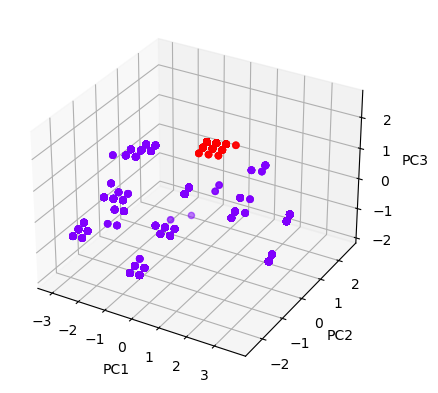

In [210]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = RFM3['PC 1']
ys = RFM3['PC 2']
zs = RFM3['PC 3']

ax.scatter(xs, ys, zs, c=RFM3['select'], cmap='rainbow')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


# Result

The table shows the RFM score and cluster results.

In [265]:
res = RFM3[RFM3.index.isin(select)].iloc[:,:10]
res

CustomerID  Monetary  Frequency  Recency  Monetary_score  \
0       12347.0   4310.00          7     1926               3   
4       12352.0   1074.53          6     1960               2   
14      12362.0   4934.53         10     1927               3   
29      12381.0   1682.71          5     1928               3   
30      12383.0   1832.92          5     2108               3   
...         ...       ...        ...      ...             ...   
4294    18245.0   2490.56          7     1931               3   
4302    18257.0   2182.23          7     1963               3   
4304    18260.0   2568.40          6     2096               3   
4311    18272.0   3028.18          6     1926               3   
4319    18283.0   2039.58         16     1927               3   

      Frequency_score  Recency_score  k-means  Gaussian Mixture  \
0                   3              0        1                 3   
4                   3              1        1                 3   
14                  3              0        1                 3   
29                  3              0        1                 3   
30                  3              2        1                 3   
...               ...            ...      ...               ...   
4294                3              0        1                 3   
4302                3              1        1                 3   
4304                3              2        1                 3   
4311                3              0        1                 3   
4319                3              0        1                 3   

      Hierarchical Clustering  
0                           1  
4                           1  
14                          1  
29                          1  
30                          1  
...                       ...  
4294                        1  
4302                        1  
4304                        1  
4311                        1  
4319                        1  

[1077 rows x 10 columns]

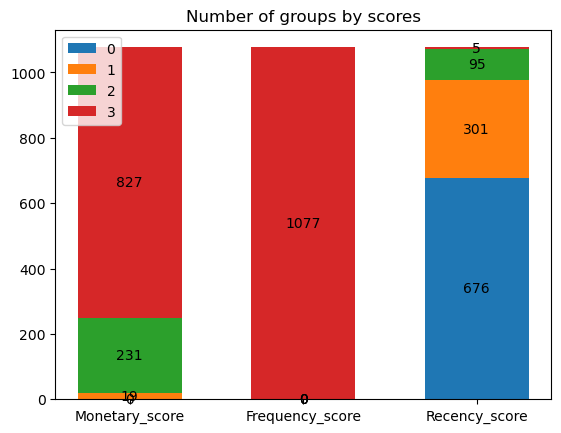

In [329]:
types = res.iloc[:, 4:7].columns.to_list()
dic = {}
for i in range(4):
    dic[i] = []
    for j in range(3):
        n = res[res[types[j]]==i].count().to_list()[0]
        dic[i] = dic[i]+[n]
width = 0.6 # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for d, dic_count in dic.items():
    p = ax.bar(types, dic_count, width, label=d, bottom=bottom)
    bottom += dic_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of groups by scores')
ax.legend()

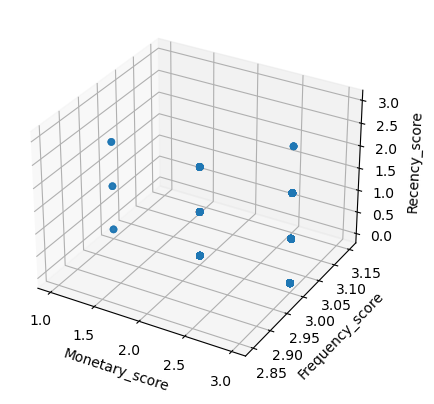

In [335]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = res['Monetary_score']
ys = res['Frequency_score']
zs = res['Recency_score']

ax.scatter(xs, ys, zs)

ax.set_xlabel('Monetary_score')
ax.set_ylabel('Frequency_score')
ax.set_zlabel('Recency_score')

plt.show()


From a business point of view, the final VIP customer still keep their resolution. For example, the points at the right top stands for group with a high frequency of purchases and a large amount of consumption but have not purchased for a long time need to make a strong call for this, and examine whether the recent product quality, marketing operations, and brand image are affected, and need to actively resonate. To retain this group and facilitate the purchase.

As a result, company can use the list and the graph above to make marketing strategies targeting to VIP customers.

# Extra

Since we have the VIP list, we can gain insight from the rest data, which we didn't use in RFM analysis.

Use PCA to understand what is the key points of a VIP customer. Here evaluate the item, quantity, unit price, and country. The result indicate that item is the most important points.

In [270]:
df = df[df['CustomerID'].isin(res['CustomerID'])].drop(columns=['InvoiceNo', 'InvoiceDate', 'CustomerID'])
df

StockCode  Quantity  UnitPrice Country
0              1       6.0       2.55       1
1              1       6.0       2.55       1
2              2       6.0       2.55       1
3              1       6.0       2.55       1
4              2       6.0       2.55       1
...          ...       ...        ...     ...
605329      2859      24.0       1.79       1
605330       106      40.0       1.45       1
605331      1471      72.0       0.72       1
605332      1722      48.0       1.85       1
605333        41       8.0       3.75       1

[228973 rows x 4 columns]

Decide to use one dimension, since the explain ratio is 99.8%.

In [272]:
pca = PCA(n_components=4)
pca.fit(df)
a = pca.explained_variance_ratio_.round(3)
a

array([0.998, 0.002, 0.   , 0.   ])

The components of PCA 1 is list below, and item is almost 1, which means greatly in fluence the segmentation result.

In [273]:
pca = PCA(n_components=1)

Principal_components=pca.fit_transform(df)
pca.components_.round(3)

array([[ 1.   , -0.001,  0.   ,  0.   ]])

In [295]:
VIPItem = real[real['CustomerID'].isin(res['CustomerID'])]
VIPItem['StockCode'].nunique()

3461

VIPs had purchased a wide variety items, so we just need to know the items that they don't buy. It can help company to know which goods are not attracted to the VIPs.

In [289]:
FailedItem = real[~real['StockCode'].isin(VIPItem)]
FailedItem['Description']

3258          POTTING SHED SOW 'N' GROW SET
3272       SET/6 IVORY BIRD T-LIGHT CANDLES
14566         PINK CHRISTMAS FLOCK DROPLET 
14582     ORIGAMI OPIUM INCENSE/CANDLE SET 
14604     ORIGAMI OPIUM INCENSE/CANDLE SET 
                        ...                
603538            LETTER "Y" BLING KEY RING
603960      HAND PAINTED HANGING EASTER EGG
604419     SET 10 CARDS 12 DAYS WRAP  17058
604720        BLACK SIL'T SQU CANDLE PLATE 
604853            LETTER "I" BLING KEY RING
Name: Description, Length: 3145, dtype: object

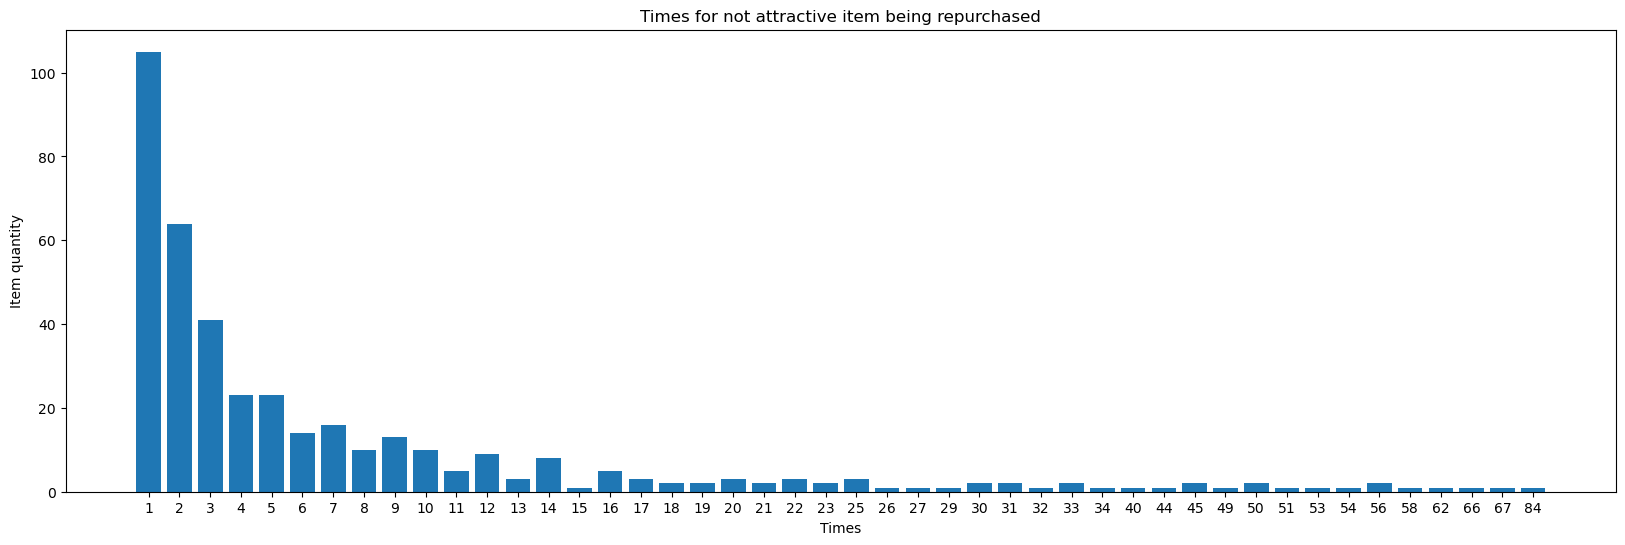

In [314]:
stati = FailedItem.groupby(['Description'])['Description'].count()
from collections import Counter
import collections
data = Counter(stati)
data = collections.OrderedDict(sorted(data.items()))
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)
plt.xlabel('Times')
plt.ylabel('Item quantity')
plt.title('Times for not attractive item being repurchased')
plt.show()